#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import distance_metric, type_metric
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from pyclustering.cluster.encoder import type_encoding, cluster_encoder
original_data=pd.read_csv('clustering.csv')
data=original_data.copy()

In [2]:
x_feature,y_class=data.iloc[:,:-1],data.iloc[:,-1]
#x_feature,y_class=np.matrix(data.iloc[:,:-1]),np.matrix(data.iloc[:,-1])
#x_feature_1=data.iloc[:,:-1]


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? (1 marks)

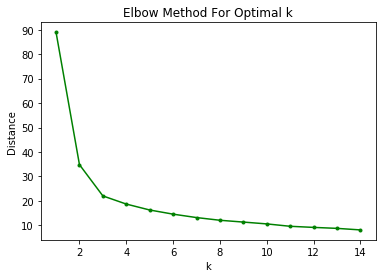

As the value of k is straighting up at position 3, so the number of clusters are same as per number of classes in the dataset


In [4]:
mms = MinMaxScaler()
mms.fit(x_feature)
data_transformed = mms.transform(x_feature)

Distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Distance.append(km.inertia_)
plt.plot(K, Distance, 'g.-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('Elbow Method For Optimal k')
plt.show()
print("As the value of k is straighting up at position 3, so the number of clusters are same as per number of classes in the dataset")

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [5]:
kmeans_1=KMeans(n_clusters=3)
cluster_predict=kmeans_1.fit_predict(x_feature)
centroids=kmeans_1.cluster_centers_
labels=kmeans_1.labels_
print(cluster_predict)

#Creating Confusion matrix for purity calculation

c_matrix=pd.crosstab(y_class,cluster_predict)
print(c_matrix)
purity_org=sum(c_matrix.max(axis=1))/c_matrix.sum().sum()
print("Purity value is: ",purity_org)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]
col_0   0   1   2
Class            
0      60   1   9
1      10  60   0
2       2   0  68
Purity value is:  0.8952380952380953


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [6]:
#Euclidean Distance
initial_centers = kmeans_plusplus_initializer(x_feature, 3).initialize()
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)
kmeans_instance= kmeans(x_feature, initial_centers, metric=euclidean_metric)
#kmeans_instance = kmeans(x_feature, initial_centers)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

type_repr = kmeans_instance.get_cluster_encoding()
encoder = cluster_encoder(type_repr, clusters,x_feature)
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
label_ec=np.array(encoder.get_clusters())
print(label_ec)


c_matrix_e=pd.crosstab(y_class,label_ec)
print(c_matrix_e)
purity_ec=sum(c_matrix_e.max(axis=1))/c_matrix_e.sum().sum()
print("Purity value is: ",purity_ec)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0   0   1   2
Class            
0      12   1  57
1       0  60  10
2      70   0   0
Purity value is:  0.8904761904761904


In [7]:
#Euclidean Square Distance
initial_centers = kmeans_plusplus_initializer(x_feature, 3).initialize()
euclidean_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
kmeans_instance= kmeans(x_feature, initial_centers, metric=euclidean_metric)
#kmeans_instance = kmeans(x_feature, initial_centers)
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

type_repr = kmeans_instance.get_cluster_encoding()
encoder = cluster_encoder(type_repr, clusters,x_feature)
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
label_ec=np.array(encoder.get_clusters())
print(label_ec)


c_matrix_e=pd.crosstab(y_class,label_ec)
print(c_matrix_e)
purity_ec_2=sum(c_matrix_e.max(axis=1))/c_matrix_e.sum().sum()
print("Purity value is: ",purity_ec_2)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0   0   1   2
Class            
0      12   1  57
1       0  60  10
2      70   0   0
Purity value is:  0.8904761904761904


In [8]:
#Manhattan Distance
initial_centers = kmeans_plusplus_initializer(x_feature, 3).initialize()
manhattan_metric = distance_metric(type_metric.MANHATTAN)
kmeans_instance = kmeans(x_feature, initial_centers, metric=manhattan_metric)
#kmeans_instance = kmeans(x_feature, initial_centers)
kmeans_instance.process()
clusters_man = kmeans_instance.get_clusters()
#final_centers = kmeans_instance.get_centers()

type_repr = kmeans_instance.get_cluster_encoding()
encoder = cluster_encoder(type_repr, clusters_man,x_feature)
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
label_man=np.array(encoder.get_clusters())
print(label_ec)


c_matrix_man=pd.crosstab(y_class,label_man)
print(c_matrix_man)
purity_man=sum(c_matrix_man.max(axis=1))/c_matrix_man.sum().sum()
print("Purity value is: ",purity_man)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0   0   1   2
Class            
0      14   0  56
1       0  58  12
2      70   0   0
Purity value is:  0.8761904761904762


In [9]:
#Chebyshev Distance
initial_centers = kmeans_plusplus_initializer(x_feature, 3).initialize()
chebyshev_metric = distance_metric(type_metric.CHEBYSHEV)
kmeans_instance = kmeans(x_feature, initial_centers, metric=chebyshev_metric)
#kmeans_instance = kmeans(x_feature, initial_centers)
kmeans_instance.process()
clusters_ch = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
clusters


type_repr = kmeans_instance.get_cluster_encoding()
encoder = cluster_encoder(type_repr, clusters_ch,x_feature)
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
label_ch=np.array(encoder.get_clusters())
print(label_ch)

c_matrix_ch=pd.crosstab(y_class,label_ch)
print(c_matrix_ch)
purity_Ch=sum(c_matrix_ch.max(axis=1))/c_matrix_ch.sum().sum()
print("Purity value is: ",purity_Ch)


[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0]
col_0   0   1   2
Class            
0       9   3  58
1       0  60  10
2      66   0   4
Purity value is:  0.8761904761904762


In [10]:
#Minkwoski Distance
initial_centers = kmeans_plusplus_initializer(x_feature, 3).initialize()
minkwoski_metric = distance_metric(type_metric.MINKOWSKI, degree=4)
kmeans_instance = kmeans(x_feature, initial_centers, metric=minkwoski_metric)
#kmeans_instance = kmeans(x_feature, initial_centers)
kmeans_instance.process()
clusters_min = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
clusters

type_repr = kmeans_instance.get_cluster_encoding()
encoder = cluster_encoder(type_repr, clusters_min,x_feature)
encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
label_min=np.array(encoder.get_clusters())
print(label_min)

c_matrix_min=pd.crosstab(y_class,label_min)
print(c_matrix_min)
purity_min=sum(c_matrix_min.max(axis=1))/c_matrix_min.sum().sum()
print("Purity value is: ",purity_min)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0]
col_0   0   1   2
Class            
0       9   1  60
1       0  60  10
2      66   0   4
Purity value is:  0.8857142857142857


In [11]:
print("Purity value for Euclidean Distance is: ",purity_ec)
print("Purity value for Euclidean Square Distance is: ",purity_ec_2)
print("Purity value Manhattan Distance is: ",purity_man)
print("Purity value Chebyshv Distance is: ",purity_Ch)
print("Purity value for Minskowski Distance is: ",purity_min)
print("Base on purity score the highest values in achieved by Euclidean Square and it is recommended for this data set. Euclidean square does not Sq.root as Euclidean, so clustering with Euclidean Sq is much faster than Euclidean.")

Purity value for Euclidean Distance is:  0.8904761904761904
Purity value for Euclidean Square Distance is:  0.8904761904761904
Purity value Manhattan Distance is:  0.8761904761904762
Purity value Chebyshv Distance is:  0.8761904761904762
Purity value for Minskowski Distance is:  0.8857142857142857
Base on purity score the highest values in achieved by Euclidean Square and it is recommended for this data set. Euclidean square does not Sq.root as Euclidean, so clustering with Euclidean Sq is much faster than Euclidean.


In [12]:
#ANOVA F Method

Anova = SelectKBest(f_classif, k=3)
fit = Anova.fit(x_feature, y_class)
score=fit.scores_
score_1=pd.DataFrame(score,columns=['Score'])
Lables=pd.DataFrame(x_feature.columns,columns=["Feature list"])
Combo=pd.concat([Lables,score_1],axis=1)
print("Three Best Feature list by ANOVA: ")
print(Combo.nlargest(3,'Score'))

chi_2 = SelectKBest(chi2, k=3)
fit_2 = chi_2.fit(x_feature,y_class)
score_chi=fit_2.scores_
score_chi_pd=pd.DataFrame(score_chi,columns=['Score'])
Lables_chi=pd.DataFrame(x_feature.columns,columns=["Feature list"])
Combo_chi=pd.concat([Lables_chi,score_chi_pd],axis=1)
print("Three Best Feature list by Chi-Square: ")
print(Combo_chi.nlargest(3,'Score'))

Three Best Feature list by ANOVA: 
  Feature list       Score
0       height  548.186479
1       length  541.579497
4          min  406.302031
Three Best Feature list by Chi-Square: 
  Feature list       Score
0       height  100.248555
5          max   42.639382
1       length   20.554840


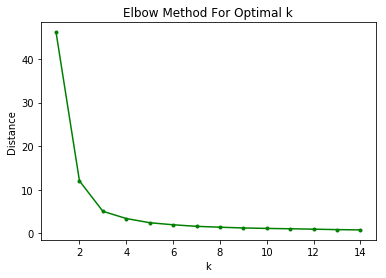

In [13]:
#Running elbow method on feature set recommended by ANOVA to determine number of cluster
x_feature,y_class=data[['height','length','min']],data['Class']
mms = MinMaxScaler()
mms.fit(x_feature)
data_transformed = mms.transform(x_feature)

Distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Distance.append(km.inertia_)
plt.plot(K, Distance, 'g.-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

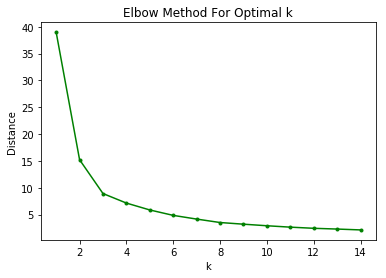

In [14]:
#Running elbow method on feature set recommended by CHI2 to determine number of cluster
x_feature,y_class=data[['height','length','max']],data['Class']
mms = MinMaxScaler()
mms.fit(x_feature)
data_transformed = mms.transform(x_feature)

Distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Distance.append(km.inertia_)
plt.plot(K, Distance, 'g.-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
#From above we can see that recommended number of cluster are 03 for both methods
#Running Kmeans
#kmeans using best features by ANOVA
#Selecting feature as highlighted by ANOVA
x_feature,y_class=data[['height','length','min']],data['Class']
#Running Kmeans
kmeans=KMeans(n_clusters=3)
cluster_predict=kmeans.fit_predict(x_feature)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
print(cluster_predict)

#Creating Confusion matrix for purity calculation

c_matrix=pd.crosstab(y_class,cluster_predict)
print(c_matrix)
purity=sum(c_matrix.max(axis=1))/c_matrix.sum().sum()
print("Purity value for featureset by Anova is: ",purity)

#Selecting feature as highlighted by CHI2
x_feature,y_class=data[['height','length','max']],data['Class']

#Running Kmeans
kmeans=KMeans(n_clusters=3)
cluster_predict=kmeans.fit_predict(x_feature)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
print(cluster_predict)

#Creating Confusion matrix for purity calculation

c_matrix=pd.crosstab(y_class,cluster_predict)
print(c_matrix)
purity=sum(c_matrix.max(axis=1))/c_matrix.sum().sum()
print("Purity value for featureset by Chi Square is: ",purity)
print("Based o purity report feature set by Chi2 is recommended")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 1 1 1 1 1
 0 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 2 0 1 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
col_0   0   1   2
Class            
0       1  52  17
1      55  15   0
2       0   0  70
Purity value for featureset by Anova is:  0.8428571428571429
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

[64.84 86.06 94.55 99.17 99.73 99.92 99.99]
Minumum Number of Dimensions that Capture 89% Variance are : 02
Minumum Number of Dimensions that Capture 99% Variance are : 04


C:\Users\kazim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


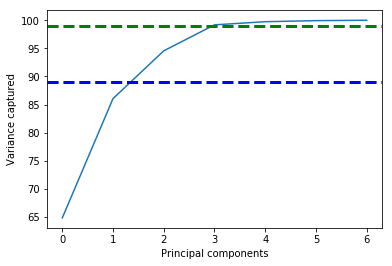

In [16]:
Xnorm = scale(data)
pca = PCA(n_components=7)
pca.fit(Xnorm)
PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
var= pca.explained_variance_ratio_
#print(var)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
#var_2=89
plt.plot(var1)
plt.axhline(y=89, color='b', linestyle='dashed', linewidth=3)
plt.axhline(y=99, color='g', linestyle='dashed', linewidth=3)

# Slice list to remove first handle
#plt.legend(handles = handles[1:], labels = labels)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
print("Minumum Number of Dimensions that Capture 89% Variance are : 02")
print("Minumum Number of Dimensions that Capture 99% Variance are : 04")

2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

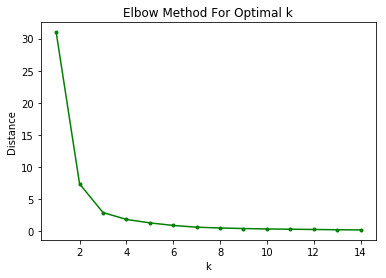

In [17]:
#89% Variance captures 02 dimensions, so creating new dataset with 02 dimensions and determing number of clusters
x_feature_89,y_class=data[['height','length']],data['Class']
mms = MinMaxScaler()
mms.fit(x_feature_89)
data_transformed = mms.transform(x_feature_89)

Distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Distance.append(km.inertia_)
plt.plot(K, Distance, 'g.-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

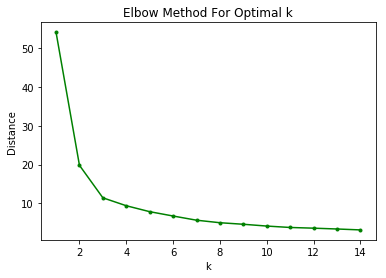

In [18]:
#99% Variance captures 04 dimensions, so creating new dataset with 02 dimensions and determing number of clusters
x_feature_99,y_class=data[['height','length','min','max']],data['Class']
mms = MinMaxScaler()
mms.fit(x_feature_99)
data_transformed = mms.transform(x_feature_99)

Distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Distance.append(km.inertia_)
plt.plot(K, Distance, 'g.-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
#Recomended number of clusters for both 89% and 99% are 03, so performing kmeans with cluters=3
#89% Variance
kmeans=KMeans(n_clusters=3)
cluster_predict=kmeans.fit_predict(x_feature_89)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
print(cluster_predict)

#Creating Confusion matrix for purity calculation

c_matrix=pd.crosstab(y_class,cluster_predict)
print(c_matrix)
purity_89=sum(c_matrix.max(axis=1))/c_matrix.sum().sum()
print("Purity value is: ",purity_89)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 2 1 1
 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
col_0   0   1   2
Class            
0      17   0  53
1       0  55  15
2      70   0   0
Purity value is:  0.8476190476190476


In [20]:
#99% Variance
kmeans=KMeans(n_clusters=3)
cluster_predict=kmeans.fit_predict(x_feature_99)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
print(cluster_predict)

#Creating Confusion matrix for purity calculation

c_matrix=pd.crosstab(y_class,cluster_predict)
print(c_matrix)
purity_99=sum(c_matrix.max(axis=1))/c_matrix.sum().sum()
print("Purity value is: ",purity_99)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
col_0   0   1   2
Class            
0      60   9   1
1      10   0  60
2       2  68   0
Purity value is:  0.8952380952380953


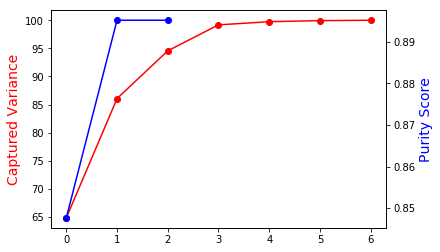

We can see that purity score increases from 0.84 to 0.89 as the number of dimensions increase but purity score is almost the same when we increase dimensions more than 4 (i.e. orignal dataset). So this means that we can use less number of dimensions using PCA and have same purity as original number of dimensions. 


In [23]:
#Plotting Purity scores and captured varainces

#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
new_pur=[]
new_pur=purity_89,purity_99,purity_org
new_pur
fig, ax = plt.subplots()
ax.plot(var1, color="red", marker="o")
ax.set_ylabel("Captured Variance",color="red",fontsize=14)
#ax.set_xlabel("Number of Dimensions",fontsize=14)
ax2=ax.twinx()
ax2.plot(new_pur,color="blue",marker="o")
ax2.set_ylabel("Purity Score",color="blue",fontsize=14)
plt.show()
print("We can see that purity score increases from 0.84 to 0.89 as the number of dimensions increase but purity score is almost the same when we increase dimensions more than 4 (i.e. orignal dataset). So this means that we can use less number of dimensions using PCA and have same purity as original number of dimensions. ")


3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

PCA works optimally well where the data is linear (linear coorelation). However,PCA can be applied to curved or non-linear datasets and it will reduce the dimensions but the resulting values will not be well organized. So we have to apply a non-linear aplgorithm to handle curverd dataset.
